In [1]:
# Import the necessary libraries
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.applications import EfficientNetB0  # Import EfficientNetB0 model
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [2]:
# Define the image size
IMAGE_SIZE = (224, 224)  # EfficientNetB0 expects 224x224 images

In [3]:
# Set the paths to the training and validation data
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [11]:
# Define the folders (class labels) in the training data directory
folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]


In [12]:
# Create image data generators for the training and validation data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [14]:
# Generate training and validation data
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=10,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=10,
    class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
# Load the EfficientNetB0 model (you can choose a different version if needed)
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


In [16]:
# Add custom head for classification
x = base_model.output

# You may need to adjust the layer for global average pooling based on the output shape of the base_model
x = keras.layers.GlobalAveragePooling2D()(x)

# Add a Dense layer with an appropriate number of units for your classification task
x = keras.layers.Dense(256, activation='relu')(x)

# Add the final classification layer with the number of classes
predictions = keras.layers.Dense(len(folders), activation='softmax')(x)

# Create the model
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

In [17]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [44]:
# Train the model
model.fit(
    training_set,
    validation_data=test_set,
    epochs=3,  # You can adjust the number of epochs as needed
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/3
522/522 [==============================] - 369s 706ms/step - loss: 0.0994 - accuracy: 0.9655 - val_loss: 0.1881 - val_accuracy: 0.9263
Epoch 2/3
522/522 [==============================] - 435s 834ms/step - loss: 0.0746 - accuracy: 0.9734 - val_loss: 0.4206 - val_accuracy: 0.9247
Epoch 3/3
522/522 [==============================] - 494s 946ms/step - loss: 0.0755 - accuracy: 0.9739 - val_loss: 0.3674 - val_accuracy: 0.8894


In [45]:
from keras.preprocessing import image

img=image.load_img('chest_xray/test/Normal/IM-0001-0001.jpeg',target_size=(224,224))

In [46]:
x=image.img_to_array(img)

In [47]:
x=np.expand_dims(x, axis=0)


In [48]:
img_data=preprocess_input(x)

In [49]:
classes=model.predict(img_data)

1/1 [==============================] - 0s 83ms/step


In [50]:
result=int(classes[0][0])

In [51]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Person is Affected By PNEUMONIA


In [52]:
# Initialize an empty list to store true and predicted labels
true_labels = []
predicted_labels = []

In [53]:
# Loop through the test set and predict labels
for i in range(len(test_set)):
    batch = test_set[i]
    images, labels = batch
    predictions = model.predict(images)
    
    # Convert one-hot encoded labels to class labels
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 66ms/step


In [54]:
true_labels

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,


In [55]:
type(true_labels)

list

In [56]:
predicted_labels

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,


In [57]:
len(predicted_labels)

624

In [58]:
len(true_labels)

624

In [59]:
t_labels=np.array(true_labels)

In [60]:
p_labels=np.array(predicted_labels)

In [61]:
type(t_labels)

numpy.ndarray

In [62]:
type(p_labels)

numpy.ndarray

In [63]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


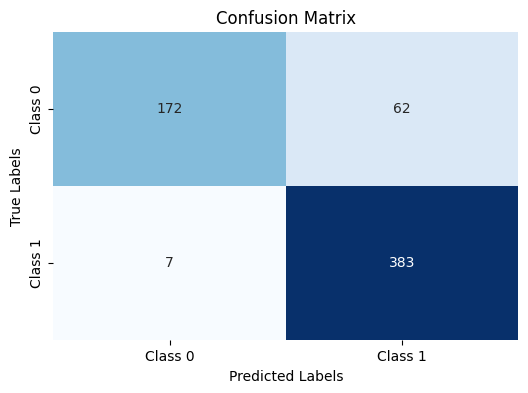

In [64]:
# Plot the confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.yticks(np.arange(len(conf_matrix)) + 0.5, ['Class 0', 'Class 1'])  # Modify class labels accordingly
plt.show()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy   :", accuracy)
precision = precision_score(true_labels, predicted_labels)
print("Precision :", precision)
recall = recall_score(true_labels, predicted_labels)
print("Recall    :", recall)
F1_score = f1_score(true_labels, predicted_labels)
print("F1-score  :", F1_score)

Accuracy   : 0.8894230769230769
Precision : 0.8606741573033708
Recall    : 0.982051282051282
F1-score  : 0.9173652694610778


In [1]:
# Import the necessary libraries
import os
import warnings
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.applications import EfficientNetB0
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from keras.callbacks import LearningRateScheduler, EarlyStopping


In [2]:
# Define the image size
IMAGE_SIZE = (224, 224)

In [3]:
# Set the paths to the training and validation data
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [4]:
# Define the folders (class labels) in the training data directory
folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]


In [5]:
# Create image data generators for the training and validation data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [6]:
# Generate training and validation data
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=16,  # Adjust batch size
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=16,  # Adjust batch size
    class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
# Load the EfficientNetB0 model
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')


In [8]:
# Add custom head for classification
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation='relu')(x)  # Experiment with different units
x = keras.layers.Dropout(0.5)(x)  # Experiment with different dropout rates
predictions = keras.layers.Dense(len(folders), activation='softmax')(x)


In [9]:
# Create the model
model = keras.models.Model(inputs=base_model.input, outputs=predictions)


In [10]:
# Compile the model
optimizer = 'adam'  # Experiment with different optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


In [11]:
# Define learning rate schedule
def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 10))

learning_rate_scheduler = LearningRateScheduler(lr_schedule)


In [12]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [14]:
# Train the model
epochs = 5  # Experiment with different numbers of epochs
model.fit(
    training_set,
    validation_data=test_set,
    epochs=epochs,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[learning_rate_scheduler, early_stopping]
)


Epoch 1/5
326/326 [==============================] - 302s 924ms/step - loss: 0.0841 - accuracy: 0.9716 - val_loss: 0.3383 - val_accuracy: 0.9183 - lr: 0.0010
Epoch 2/5
326/326 [==============================] - 309s 947ms/step - loss: 0.0712 - accuracy: 0.9734 - val_loss: 0.2484 - val_accuracy: 0.9327 - lr: 0.0010
Epoch 3/5
326/326 [==============================] - 320s 981ms/step - loss: 0.0664 - accuracy: 0.9764 - val_loss: 0.2823 - val_accuracy: 0.9071 - lr: 0.0010
Epoch 4/5
326/326 [==============================] - 321s 983ms/step - loss: 0.0698 - accuracy: 0.9766 - val_loss: 0.4279 - val_accuracy: 0.8766 - lr: 0.0010
Epoch 5/5
326/326 [==============================] - 338s 1s/step - loss: 0.0654 - accuracy: 0.9787 - val_loss: 0.2219 - val_accuracy: 0.9279 - lr: 0.0010
